<a href="https://colab.research.google.com/github/yves-ganza/demo-repo/blob/main/q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def to_csv(imgf,labelf,outputf,size):

  with open(imgf, 'rb') as imgfile, open(labelf, 'rb') as labelfile, open(outputf, 'w') as outputfile:
    images = []

    imgfile.read(16)
    labelfile.read(8)

    for i in range(size):
      image = [ord(labelfile.read(1))]
      for j in range(28*28):
        image.append(ord(imgfile.read(1)))
      images.append(image)
    for image in images:
      outputfile.write(','.join(str(pix) for pix in image)+'\n')


In [ ]:
to_csv('/content/drive/MyDrive/winter2021/COMP4107/mnist_data/train-images-idx3-ubyte', '/content/drive/MyDrive/winter2021/COMP4107/mnist_data/train-labels-idx1-ubyte','/content/drive/MyDrive/winter2021/COMP4107/mnist_data/train-images.csv',60000)
to_csv('/content/drive/MyDrive/winter2021/COMP4107/mnist_data/t10k-images-idx3-ubyte', '/content/drive/MyDrive/winter2021/COMP4107/mnist_data/t10k-labels-idx1-ubyte','/content/drive/MyDrive/winter2021/COMP4107/mnist_data/test-images.csv',10000)

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/winter2021/COMP4107/mnist_data/train-images.csv', header=None)
test = pd.read_csv('/content/drive/MyDrive/winter2021/COMP4107/mnist_data/test-images.csv', header=None)

In [ ]:
c_names = ['pixel'+ str(i) for i in range(1,785)]
c_names.insert(0, 'label')
train.columns = c_names
test.columns = c_names
print(train.shape, test.shape)

(60000, 785) (10000, 785)


5


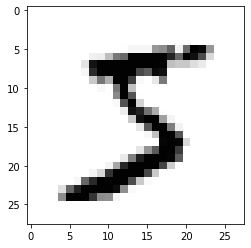

6


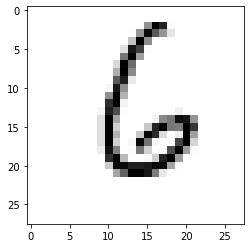

2


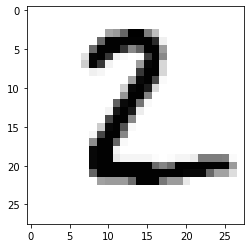

In [ ]:
import matplotlib.pyplot as plt

print(train.iloc[0][0])
plt.imshow(train.iloc[0][1:].values.reshape(28,28),cmap='Greys')
plt.show()
print(train.iloc[32][0])
plt.imshow(train.iloc[32][1:].values.reshape(28,28),cmap='Greys')
plt.show()
print(test.iloc[1][0])
plt.imshow(test.iloc[1][1:].values.reshape(28,28), cmap='Greys')

In [ ]:
import numpy as np
def getU():
  U_array = []
  for i in range(10):
    Ai = train[train['label']==i]
    Ai = Ai[Ai.columns[1:]].T
    U,e,v = np.linalg.svd(Ai, full_matrices=False)
    U_array.append(U)
  return U_array
U_array = getU()

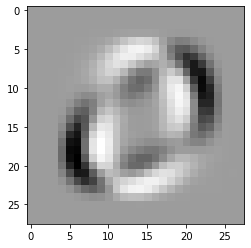

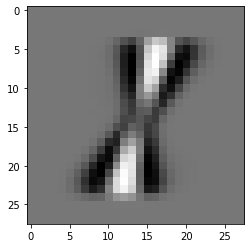

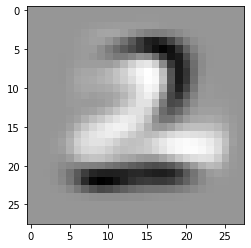

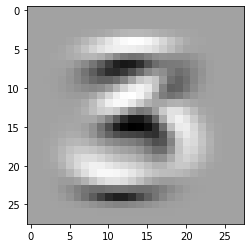

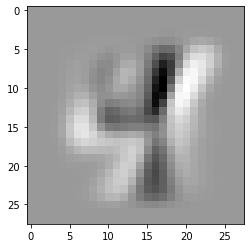

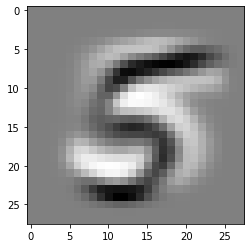

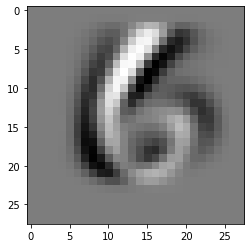

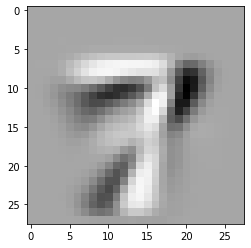

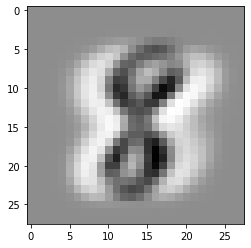

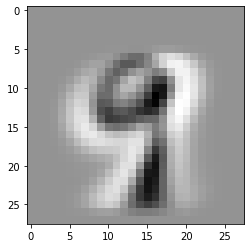

In [5]:
for i in range(len(U_array)):
    plt.imshow(U_array[i][:,2].reshape(28,28),cmap='Greys')
    plt.show()

In [15]:
Uk_array = []
for k in range(1,52):
  temp = []
  for i in range(len(U_array)):
    U = U_array[i][:,:k]
    temp.append((np.identity(len(U)) - np.dot(U,(U.T))))
  Uk_array.append(temp)

In [23]:
len(Uk_array[0])

10

In [21]:
def classify(z,Uk):
  residuals = []
  for i in range(len(Uk)):
    residuals.append(np.linalg.norm(Uk[i].dot(z))/np.linalg.norm(z, ord=2))
  return residuals.index(min(residuals))

In [24]:
classifications = {}
for i in range(10):
  one_test = test[test['label']==i]
  newdigit = one_test[one_test.columns[1:]]
  print(f'Classifying digit {i}')
  accuracies = []
  for k in range(0,51):
    predictions=[]
    for j in range(len(newdigit)):
      z = newdigit.iloc[j]
      predictions.append(classify(z,Uk_array[k]))
    accuracy = (predictions.count(i)/1.0/len(predictions))*100
    accuracies.append(round(accuracy,2))
  classifications[i]=accuracies

Classifying digit 0
Classifying digit 1
Classifying digit 2
Classifying digit 3
Classifying digit 4
Classifying digit 5
Classifying digit 6
Classifying digit 7
Classifying digit 8
Classifying digit 9


In [28]:
type(classifications[0])

list

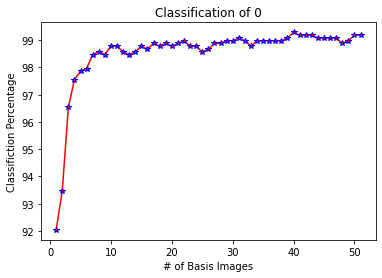

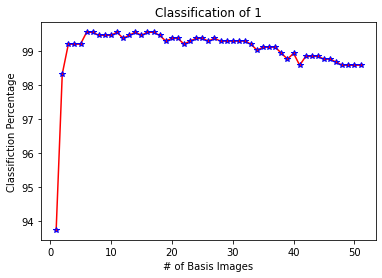

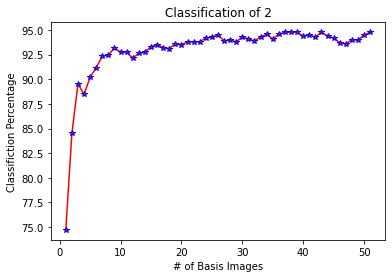

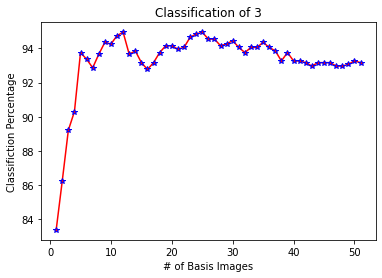

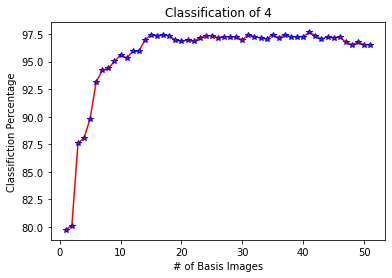

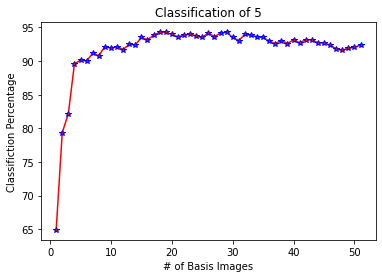

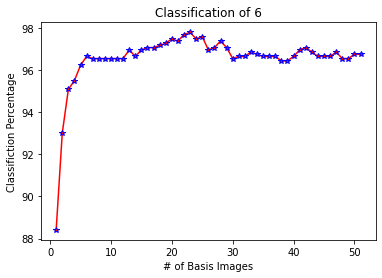

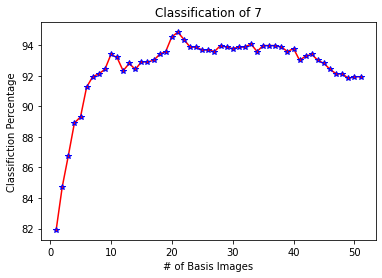

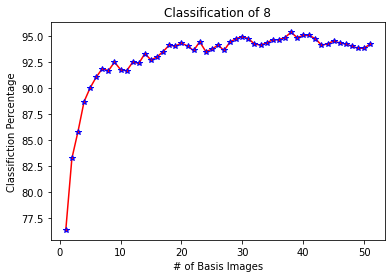

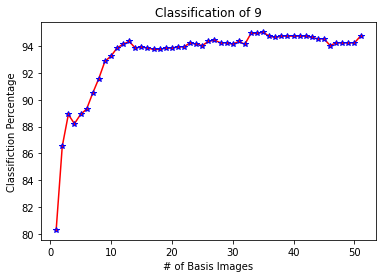

In [29]:
x = [i for i in range(1, 52)]
for i in range(len(classifications)):
  y = classifications[i]
  plt.plot(x, y, color='red', marker='*', markeredgecolor='blue')
  plt.xlabel('# of Basis Images')
  plt.ylabel('Classifiction Percentage')
  plt.title(f'Classification of {i}')
  plt.show()